LOAD THE NEEDED LIBRARIES 

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk("C:/brotherman/FINAL PROJECT"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/brotherman/FINAL PROJECT\bosch-title.webp
C:/brotherman/FINAL PROJECT\FINAL PROJECT.pptx
C:/brotherman/FINAL PROJECT\retail_price.csv
C:/brotherman/FINAL PROJECT\~$FINAL PROJECT.pptx


LOAD THE DATA 

In [127]:
df = pd.read_csv("C:/brotherman/FINAL PROJECT/retail_price.csv")
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


EXPLORATORY DATA ANALYSIS

In [129]:
#Checking for null values 

df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [131]:
df.shape

(676, 30)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [135]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [137]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [139]:
df.index

RangeIndex(start=0, stop=676, step=1)

In [141]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [143]:
df.head(2)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95


In [145]:
df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [147]:
df['qty'].sum()

9799

In [149]:
df['total_price'].sum()

961751.0999999999

In [151]:
df.count()

product_id                    676
product_category_name         676
month_year                    676
qty                           676
total_price                   676
freight_price                 676
unit_price                    676
product_name_lenght           676
product_description_lenght    676
product_photos_qty            676
product_weight_g              676
product_score                 676
customers                     676
weekday                       676
weekend                       676
holiday                       676
month                         676
year                          676
s                             676
volume                        676
comp_1                        676
ps1                           676
fp1                           676
comp_2                        676
ps2                           676
fp2                           676
comp_3                        676
ps3                           676
fp3                           676
lag_price     

REVENUE AND PROFIT 

In [153]:
df['revenue'] = df['qty'] * df['total_price']
df['profit'] = df['revenue'] - df['freight_price']

PROFIT MARGINS 

In [155]:
df['margin'] = (df['profit'] / df['revenue']) * 100

PRICE RATIOS 

In [157]:
df['price_ratio_1'] = df['unit_price'] / df['comp_1'] ##First competitor 
df['price_ratio_2'] = df['unit_price'] / df['comp_2'] ##Second competitor
df['price_ratio_3'] = df['unit_price'] / df['comp_3'] ##Third competitor 

PRICE DIFFERENCES 

In [159]:
df['price_diff_1'] = df['unit_price'] - df['comp_1']
df['price_diff_2'] = df['unit_price'] - df['comp_2']
df['price_diff_3'] = df['unit_price'] - df['comp_3']

In [161]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


MARKET DEMAND INDICATORS  

In [163]:
df['customer_score_ratio'] = df['customers'] / df['product_score']
df['customer_photo_ratio'] = df['customers'] / df['product_photos_qty']
df['description_length_ratio'] = df['product_description_lenght'] / df['product_name_lenght']

In [165]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


TIME RELATED FEATURES 

In [167]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['is_holiday'] = df['holiday']

In [169]:
df.head(3).transpose()

,0,1,2
product_id,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table
month_year,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00
qty,1,3,6
total_price,45.95,137.85,275.7
freight_price,15.1,12.933333,14.84
unit_price,45.95,45.95,45.95
product_name_lenght,39,39,39
product_description_lenght,161,161,161
product_photos_qty,2,2,2


LAGGED PRICE 

In [171]:
df['lag_price'] = df.groupby('product_id')['total_price'].shift(1)

HANDLING CATEGORICAL VARIABLE 

In [173]:
# One-hot encoding example
df_encoded = pd.get_dummies(df, columns=['product_category_name', 'weekday'])

SCALING NUMERIC FEATURES 

In [174]:
scaler = StandardScaler()
numeric_features = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
                    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                    'product_score', 'customers', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2',
                    'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']

df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

DATA VISUALIZATION 

In [177]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'revenue', 'profit', 'margin',
       'price_ratio_1', 'price_ratio_2', 'price_ratio_3', 'price_diff_1',
       'price_diff_2', 'price_diff_3', 'customer_score_ratio',
       'customer_photo_ratio', 'description_length_ratio', 'is_weekend',
       'is_holiday'],
      dtype='object')

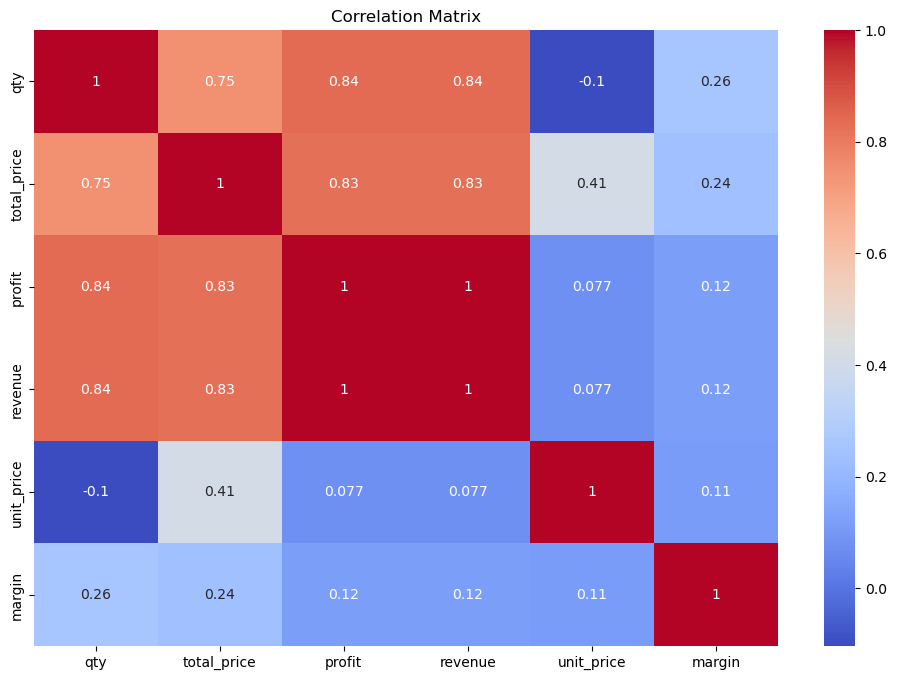

In [209]:
# Subset the dataset with relevant columns
subset_cols = ['qty', 'total_price', 'profit', 'revenue', 'unit_price', 'margin']
subset_df = df[subset_cols]

# Compute correlation matrix
corr_matrix = subset_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

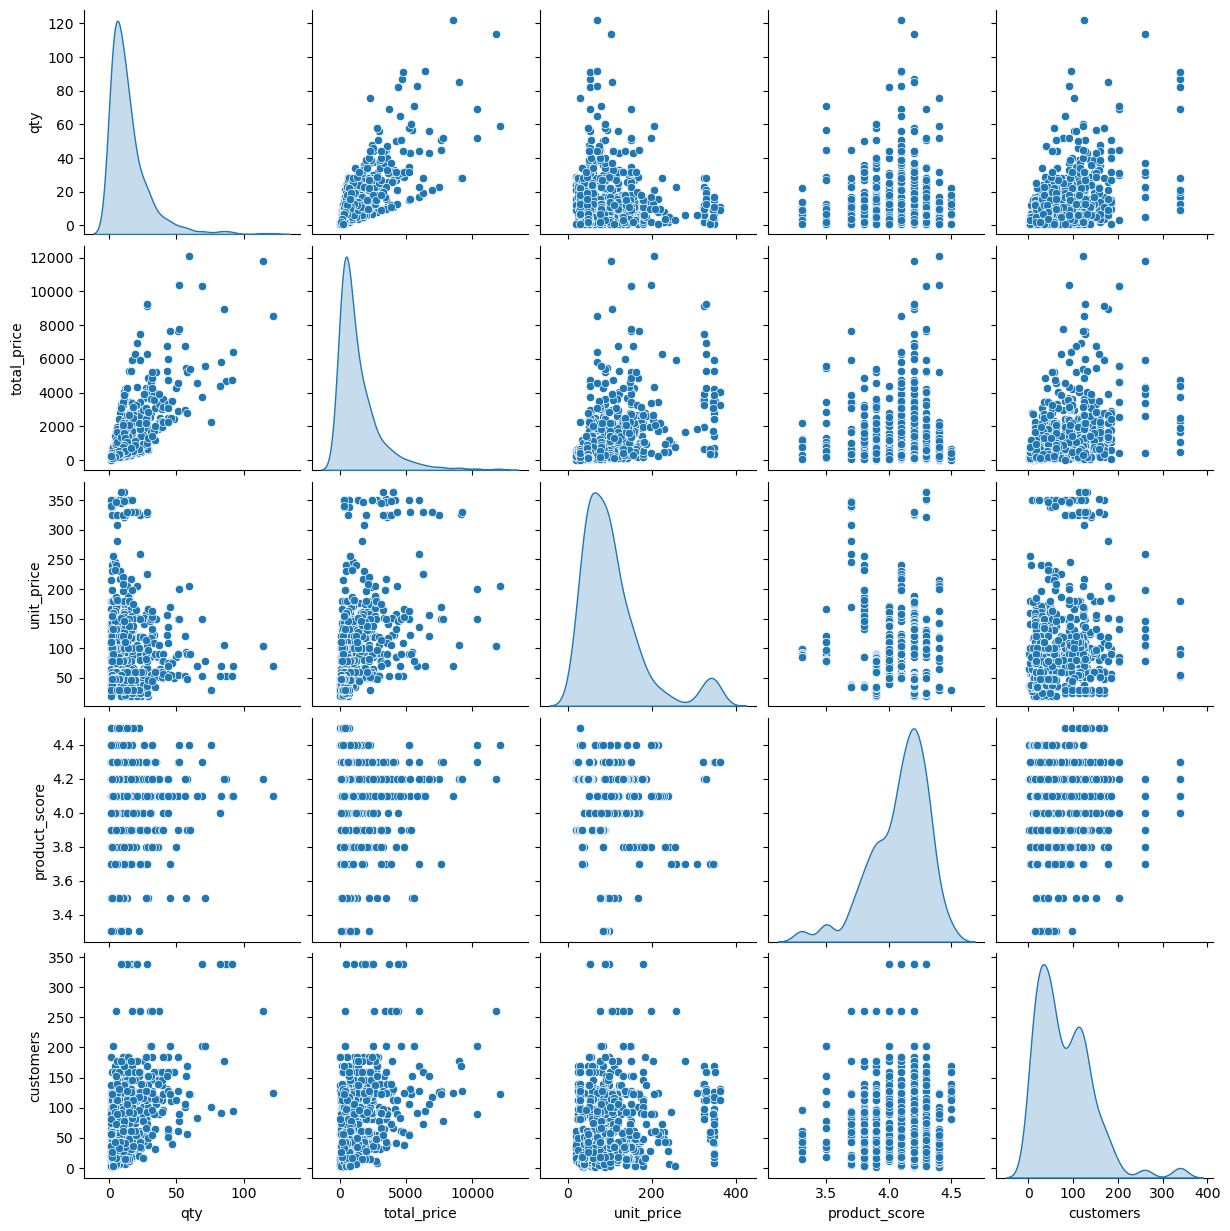

In [181]:
# Pairwise scatter plot
sns.pairplot(subset_df, vars=['qty', 'total_price', 'unit_price', 'product_score', 'customers'], diag_kind='kde')
plt.show()

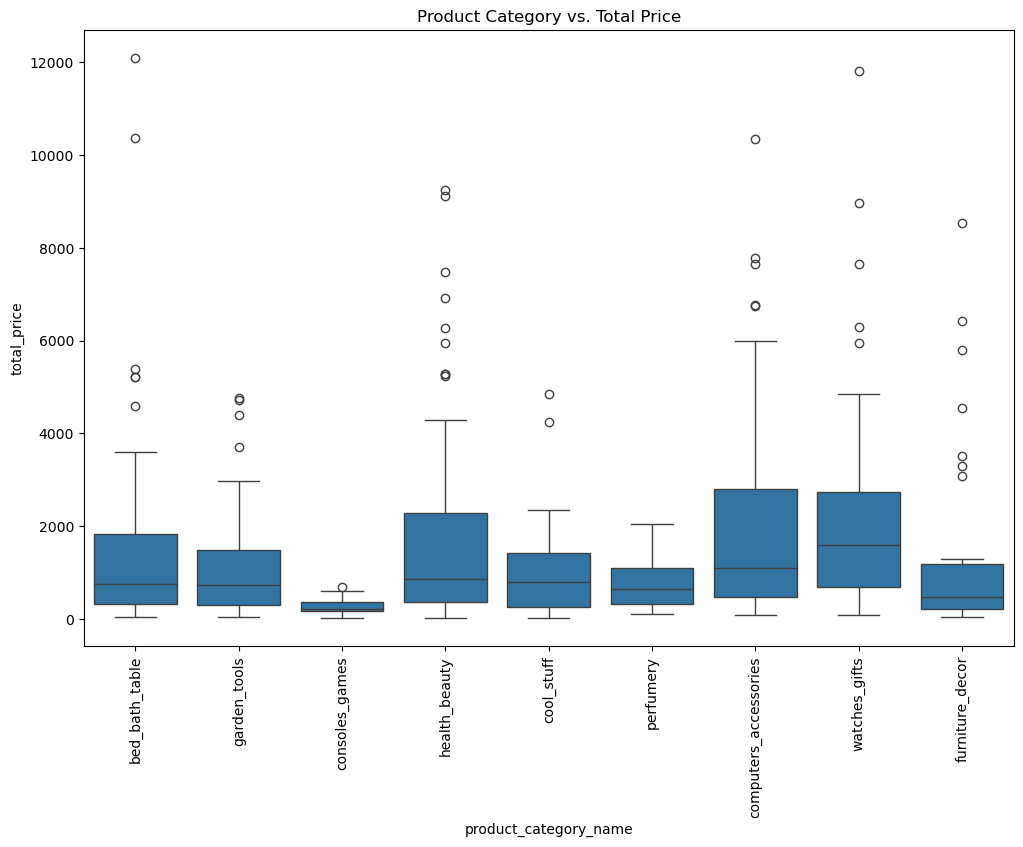

In [183]:
# Boxplot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
sns.boxplot(x='product_category_name', y='total_price', data=df)
plt.title('Product Category vs. Total Price')
plt.xticks(rotation=90)
plt.show()

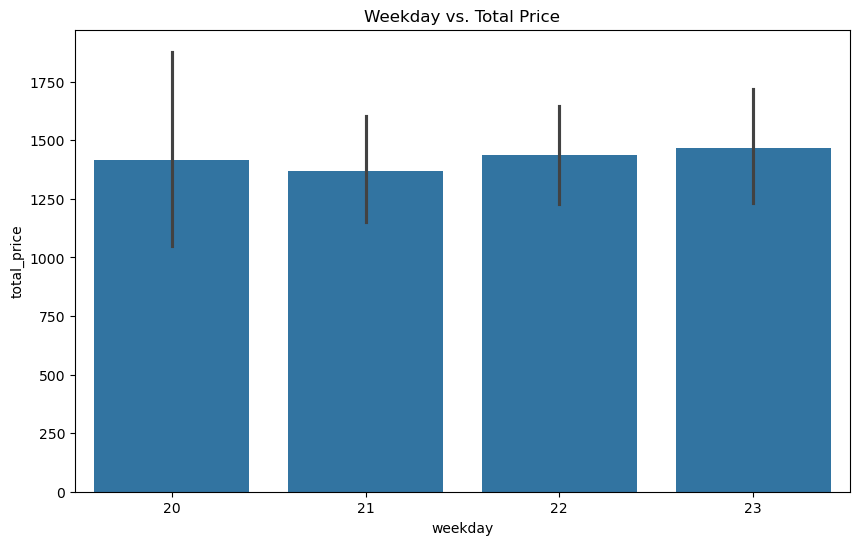

In [185]:
# Bar plot of weekday vs. total_price
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_price', data=df)
plt.title('Weekday vs. Total Price')
plt.show()

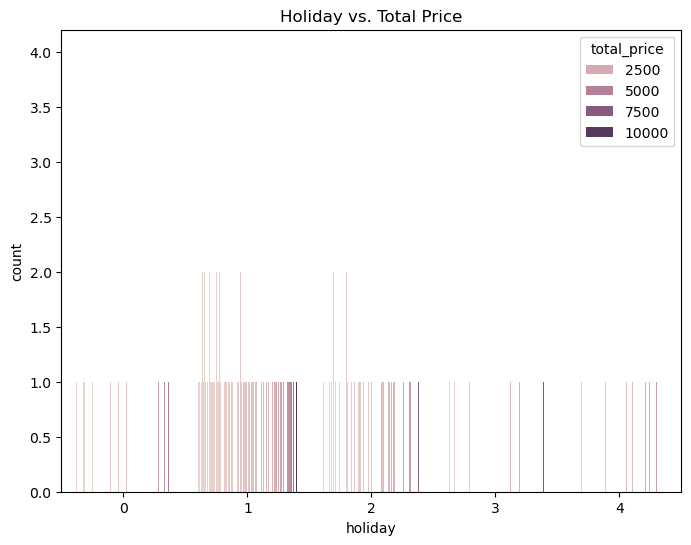

In [187]:
# Count plot of holiday vs. total_price
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', data=df, hue='total_price')
plt.title('Holiday vs. Total Price')
plt.show()

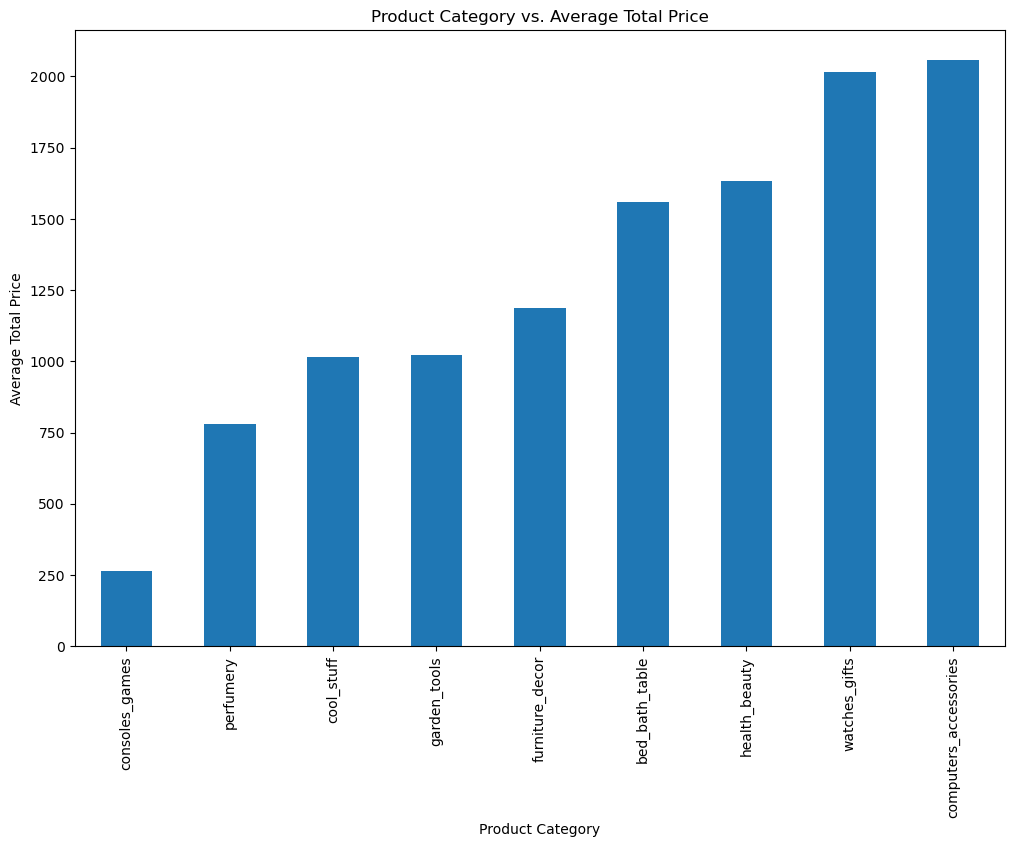

In [189]:
# Bar plot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('product_category_name')['total_price'].mean().sort_values().plot(kind='bar')
plt.title('Product Category vs. Average Total Price')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=90)
plt.show()

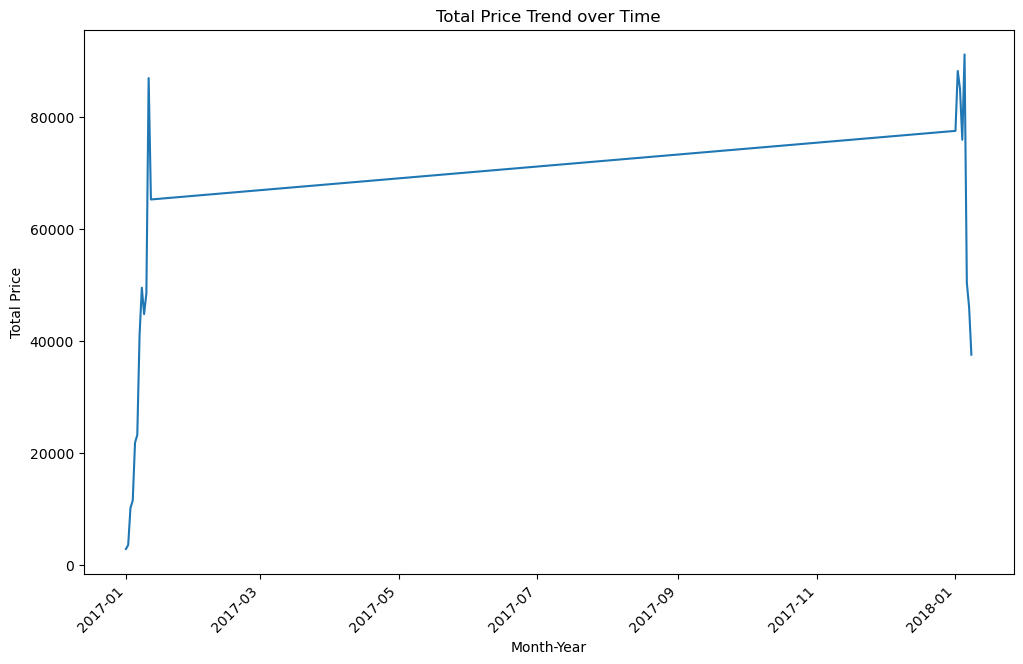

In [191]:
# Line plot of month_year vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('month_year')['total_price'].sum().plot(kind='line')
plt.title('Total Price Trend over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

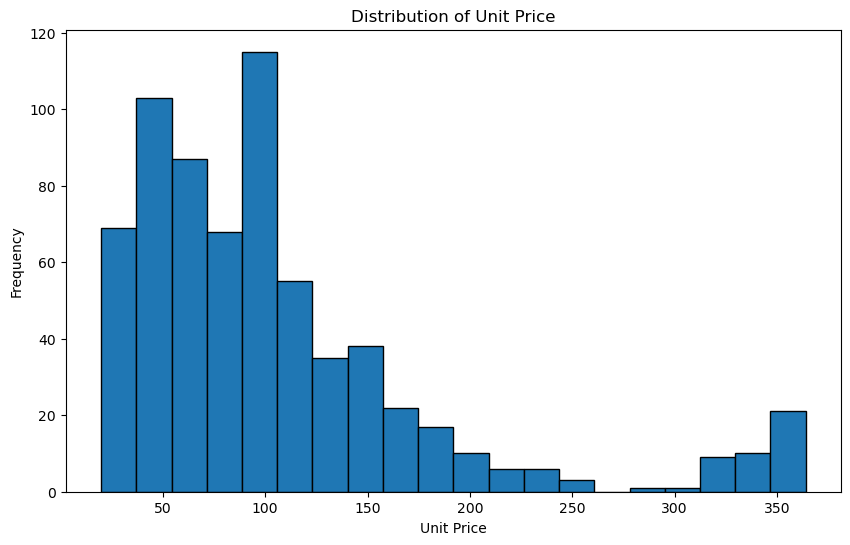

In [193]:
# Histogram of unit_price
plt.figure(figsize=(10, 6))
plt.hist(df['unit_price'], bins=20, edgecolor='k')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

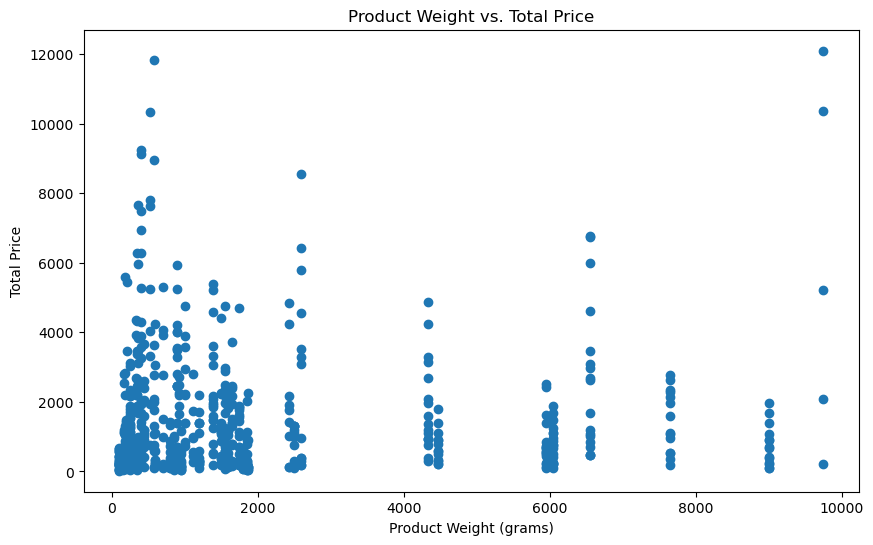

In [195]:
# Scatter plot of product_weight_g vs. total_price
plt.figure(figsize=(10, 6))
plt.scatter(df['product_weight_g'], df['total_price'])
plt.title('Product Weight vs. Total Price')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Total Price')
plt.show()

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# 1. Drop or convert datetime columns and separate features and target
X = df_scaled.drop('total_price', axis=1)  # Features
y = df_scaled['total_price']  # Target variable

# Drop datetime columns
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

# 2. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Store feature names for later use
feature_names = X.columns.tolist()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines with imputation, standardization, and the model
pipeline_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LinearRegression()
)

pipeline_rf = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# Fit the models
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# Predict using the models
lr_preds = pipeline_lr.predict(X_test)
rf_preds = pipeline_rf.predict(X_test)

# 4. Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  RMSE: {mean_squared_error(y_true, y_pred, squared=False):.4f}")
    print(f"  R^2: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Extract feature importances
lr_coefficients = pipeline_lr.named_steps['linearregression'].coef_
rf_feature_importances = pipeline_rf.named_steps['randomforestregressor'].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression_Coefficient': lr_coefficients,
    'Random_Forest_Importance': rf_feature_importances
})

# Sort the DataFrame by Random Forest feature importance
feature_importance_df = feature_importance_df.sort_values(by='Random_Forest_Importance', ascending=False)

print(feature_importance_df)

Linear Regression Performance:
  RMSE: 0.4352
  R^2: 0.8270

Random Forest Performance:
  RMSE: 0.2193
  R^2: 0.9561

                 Feature  Linear_Regression_Coefficient  \
26                profit                   2.162859e+12   
25               revenue                  -2.162840e+12   
2             unit_price                   1.134598e+12   
33          price_diff_3                  -5.152610e+12   
27                margin                   2.423096e-02   
..                   ...                            ...   
62  product_id_consoles1                  -1.940473e+12   
83    product_id_health1                   3.272915e+12   
87    product_id_health4                  -7.384942e+11   
11                 month                  -7.853925e+11   
37            is_weekend                  -1.672550e+12   

    Random_Forest_Importance  
26              4.710276e-01  
25              3.986658e-01  
2               5.680825e-02  
33              2.054662e-02  
27              6.

C:\Users\GADGET STORE\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\GADGET STORE\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


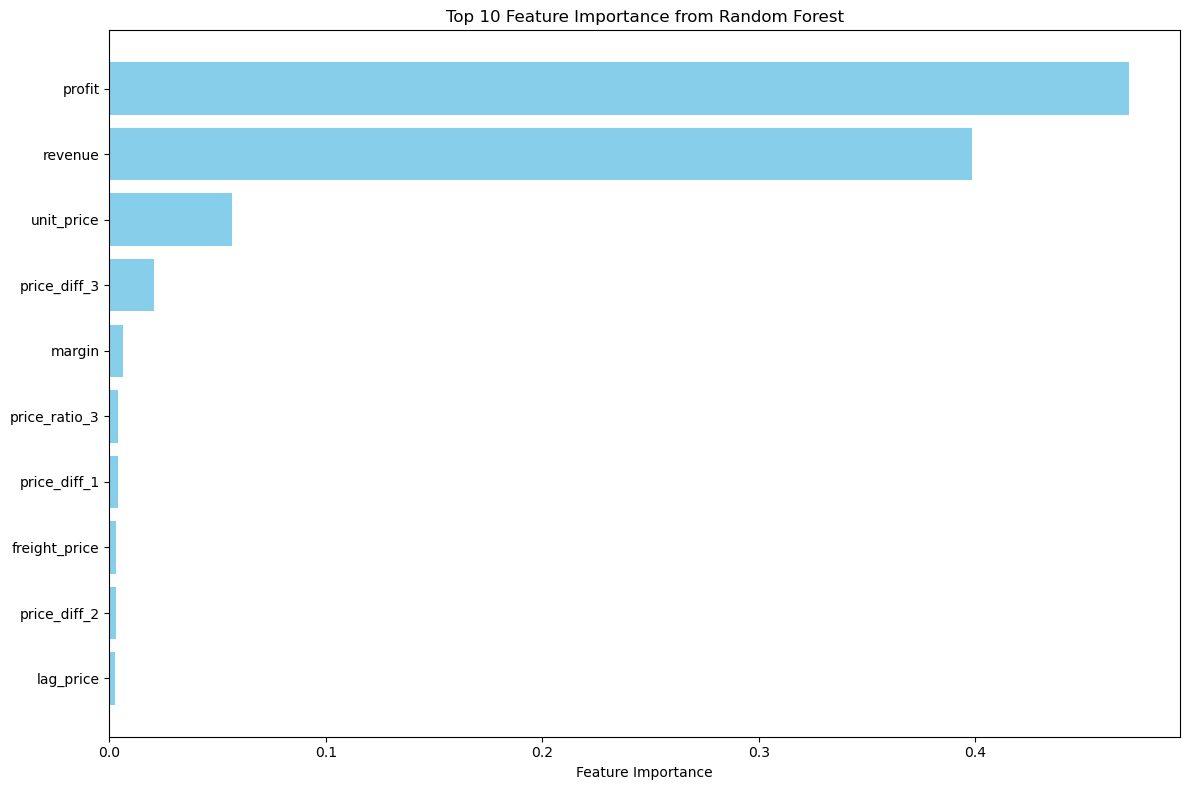

In [207]:
# Extract feature importances from the Random Forest model
rf_feature_importances = pipeline_rf.named_steps['randomforestregressor'].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random_Forest_Importance': rf_feature_importances
})

# Sort the DataFrame by Random Forest feature importance and select top 10
feature_importance_df = feature_importance_df.sort_values(by='Random_Forest_Importance', ascending=False).head(10)

# Plot feature importances
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for Random Forest feature importances
ax.barh(feature_importance_df['Feature'], feature_importance_df['Random_Forest_Importance'], color='skyblue')
ax.set_xlabel('Feature Importance')
ax.set_title('Top 10 Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top

plt.tight_layout()
plt.show()

In [211]:
df.to_csv('cleaned_retail_price.csv', index=True)

HOSTING THE MODEL ON AWS

In [215]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

# Load your cleaned dataset here
df_scaled = pd.read_csv('cleaned_retail_price.csv')  # <- Replace with your file

# Step 2: Feature Selection and Preprocessing
X = df_scaled.drop('total_price', axis=1)
y = df_scaled['total_price']
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])
X = pd.get_dummies(X, drop_first=True)
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Pipeline
pipeline_rf = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)
pipeline_rf.fit(X_train, y_train)

# Step 4: Save the Model
joblib.dump(pipeline_rf, 'regression_model.pkl')
joblib.dump(feature_names, 'features.pkl')

# Step 5: Create Flask App
with open("app.py", "w") as f:
    f.write('''
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

model = joblib.load('regression_model.pkl')
feature_names = joblib.load('features.pkl')

@app.route('/')
def home():
    return 'Regression Model is Running!'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)

    try:
        input_df = pd.DataFrame([data])
        input_df = pd.get_dummies(input_df)
        missing_cols = set(feature_names) - set(input_df.columns)
        for col in missing_cols:
            input_df[col] = 0
        input_df = input_df[feature_names]

        prediction = model.predict(input_df)
        return jsonify({'predicted_total_price': prediction[0]})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
''')

# Step 6: Create requirements.txt
with open("requirements.txt", "w") as f:
    f.write('''
flask
scikit-learn
pandas
numpy
joblib
''')

# Step 7: Create Dockerfile
with open("Dockerfile", "w") as f:
    f.write('''
FROM python:3.10

WORKDIR /app

COPY requirements.txt .
RUN pip install -r requirements.txt

COPY . .

EXPOSE 5000

CMD ["python", "app.py"]
''')

print("All deployment files created: model, Flask app, Dockerfile, requirements.txt")


All deployment files created: model, Flask app, Dockerfile, requirements.txt
